In [1]:
import requests
import time
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def get_top_movies_per_month(year_list):
        #yearlist = [2020,2019,2040]
        frames = []
        
        for year in year_list:
            for month in range(1,13):
                url = 'https://www.the-numbers.com/movies/report/All/All/All/All/All/All/All/All/All/None/None/{}/{}/{}/{}/None/None/None/None?show-release-date=On&view-order-by=domestic-box-office&view-order-direction=desc&show-domestic-box-office=On&show-genre=On'.format(year, year, month, month)
                html_page = requests.get(url)
                #frames.append(pd.read_html(html_page.text, index_col=0)[0])
                #frames.append(pd.read_html(html_page.text)[0])
                frames.append(pd.read_html(html_page.text, index_col=None)[0])
                
        return pd.concat(frames)

In [ ]:
def no_char(col):
    # enter dataframe column to return string of the column back w/o '$' and ','.
    df1 = col
   
    df1 = df1.str.replace('$', '')
    df1 = df1.str.replace(',', '')
    
    return df1

In [ ]:
# create a list of years to scrape
year_list = [2020, 2019, 2018, 2017, 2016]

#creates a dataframe of scraped data
df = get_top_movies_per_month(year_list)

In [ ]:
#renames column and limits data to movies that made at least a dollar
df = df.rename(columns={"DomesticBox Office":"DomesticBox_Office"})
df = df[df.DomesticBox_Office != "$0" ]

#takes the '$' and ',' out of the string. Example: "$1,200,000" to "12000000"
df["DomesticBox_Office"] = no_char(df["DomesticBox_Office"])

#because there isn't any missing values in DomesticBox_office, we can immediatly change column to int
df['DomesticBox_Office'] = df['DomesticBox_Office'].astype(int)

#sort rows by DomesticBox_Office values
df = df.sort_values("DomesticBox_Office", ascending=False)

#reset index based of rank
df = df.reset_index()

#convert 'Released' column to Datetime to sparse out new columns 'Month' and 'year'
df['Released'] = pd.to_datetime(df['Released'])
df['Month'] = df['Released'].dt.month
df['Year'] = df['Released'].dt.year

#dropping unneccerary columns
df = df.drop("Released", axis=1)
df = df.drop("Unnamed: 0", axis=1)
df = df.drop("index", axis=1)

In [ ]:
#exports the cleaned table to a .csv file
#also makes for a nice save point for future work
df.to_csv('Cleaned_movie_data.csv')

In [53]:
# converting .csv to dataframe for future work
df = pd.read_csv('Cleaned_movie_data.csv', index_col = 0)
df.head()

,Title,Genre,DomesticBox_Office,Month,Year
0,Avengers: Endgame,Action,858373000,4,2019
1,Black Panther,Action,700059566,2,2018
2,Avengers: Infinity War,Action,678815482,4,2018
3,Star Wars Ep. VIII: The Last Jedi,Adventure,620181382,12,2017
4,Incredibles 2,Adventure,608581744,6,2018


Everything below this isn't included, I'm not ready to delete code quite yet, 
if you want to delete on your branch, that is more than ok!

=======================================================================

=======================================================================

=======================================================================

========================================================================

========================================================================



In [3]:
df['Genre'] = df['Genre'].fillna("Other")

In [38]:
df.sum('DomesticBox_Office')

ValueError: No axis named DomesticBox_Office for object type <class 'pandas.core.frame.DataFrame'>

Text(0.5, 1.0, 'Avg Domestic Gross $ Per Genre (2016-2020)')

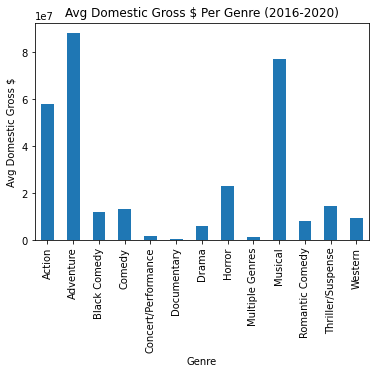

In [100]:
ax=df.groupby('Genre')['DomesticBox_Office'].mean().plot(kind='bar', y="Average Domestic Box Office $", stacked=False)

ax.set_ylabel("Avg Domestic Gross $")
ax.set_title("Avg Domestic Gross $ Per Genre (2016-2020)")

Text(0.5, 1.0, 'Count of Movie Titles Per Genre (2016-2020)')

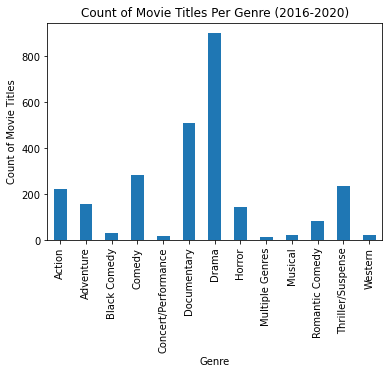

In [101]:
ax2=df.groupby('Genre')['DomesticBox_Office'].count().plot(kind='bar', y='DomesticBox_Office', stacked=False)
ax2.set_ylabel("Count of Movie Titles")
ax2.set_title("Count of Movie Titles Per Genre (2016-2020)")

Text(0.5, 1.0, 'Total Domestic Gross $ per Genre (2016-2020)')

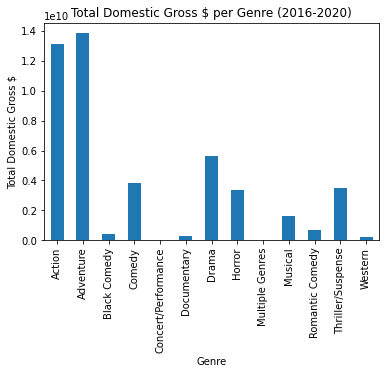

In [102]:
#df.groupby('Genre')['DomesticBox_Office'].sum().plot(kind='bar', y='DomesticBox_Office', stacked=False).legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
#ax.set_ylabel
ax3=df.groupby('Genre')['DomesticBox_Office'].sum().plot(kind='bar', y='DomesticBox_Office', stacked=False)
ax3.set_ylabel("Total Domestic Gross $")
ax3.set_title("Total Domestic Gross $ per Genre (2016-2020)")

Text(0, 0.5, 'Domestic Gross $')

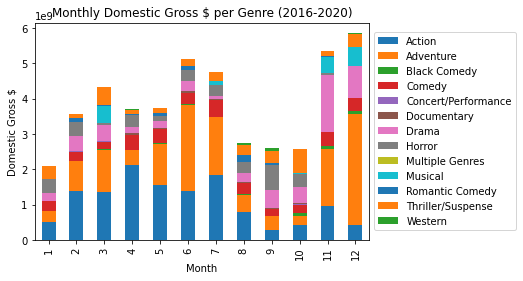

In [119]:
#df.groupby(['Month', 'Genre']).sum().unstack().plot(kind='bar', y='DomesticBox_Office', stacked=True)
ax4 = df.groupby(['Month', 'Genre']).sum().unstack().plot(kind='bar', title='Monthly Domestic Gross $ per Genre (2016-2020)', y='DomesticBox_Office', stacked=True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
plt.ylabel("Domestic Gross $")

Text(0, 0.5, 'Count of Movie Titles')

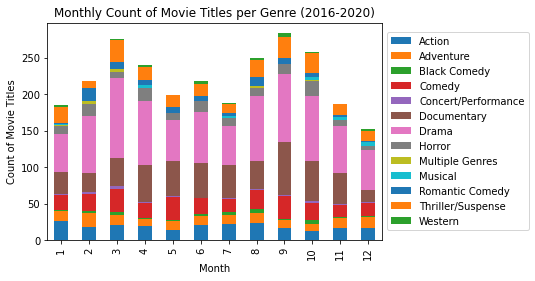

In [121]:
df.groupby(['Month', 'Genre']).count().unstack().plot(kind='bar', title="Monthly Count of Movie Titles per Genre (2016-2020)", y='DomesticBox_Office', stacked=True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
plt.ylabel("Count of Movie Titles")

Text(0, 0.5, 'Avg Gross $')

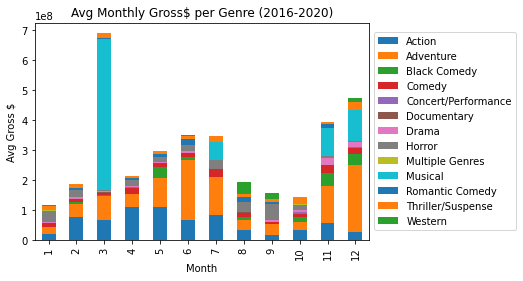

In [124]:
df.groupby(['Month', 'Genre']).mean().unstack().plot(kind='bar', title="Avg Monthly Gross$ per Genre (2016-2020)", y='DomesticBox_Office', stacked=True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
plt.ylabel("Avg Gross $")

Text(0, 0.5, 'Total Gross $')

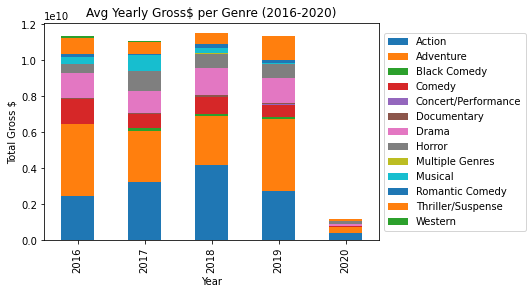

In [125]:
df.groupby(['Year', 'Genre']).sum().unstack().plot(kind='bar', title="Avg Yearly Gross$ per Genre (2016-2020)", y='DomesticBox_Office', stacked=True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
plt.ylabel("Total Gross $")

In [36]:
data2.head
print(data2.head)

<bound method NDFrame.head of Month  Genre              
1      Action                   1193442.5
       Adventure                1669230.5
       Black Comedy              108110.0
       Comedy                    126724.0
       Concert/Performance       863000.0
                                 ...     
12     Horror                     38785.0
       Musical                151101803.0
       Romantic Comedy           162873.5
       Thriller/Suspense         396305.0
       Western                 14913485.0
Name: DomesticBox_Office, Length: 149, dtype: float64>


In [34]:
data2.shape

AttributeError: 'SeriesGroupBy' object has no attribute 'shape'

In [50]:
df['percentage'] = df['DomesticBox_Office']/(df['DomesticBox_Office'].sum())
print(df)

                                  Title              Genre  \
0                     Avengers: Endgame             Action   
1                         Black Panther             Action   
2                Avengers: Infinity War             Action   
3     Star Wars Ep. VIII: The Last Jedi          Adventure   
4                         Incredibles 2          Adventure   
...                                 ...                ...   
2655                       Mobile Homes              Drama   
2656                               2:22  Thriller/Suspense   
2657  Des nouvelles de la planÃ¨te Mars             Comedy   
2658                            Satanic             Horror   
2659                         (M)uchenik              Drama   

      DomesticBox_Office  Month  Year    percentage  
0              858373000      4  2019  1.847887e-02  
1              700059566      2  2018  1.507074e-02  
2              678815482      4  2018  1.461340e-02  
3              620181382     12  2017  

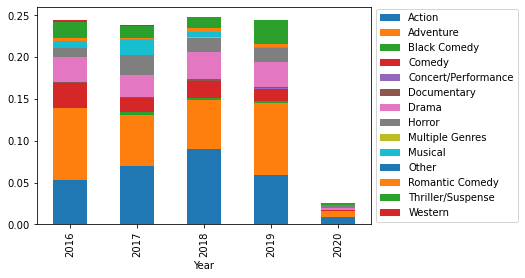

In [51]:
df.groupby(['Year', 'Genre']).sum().unstack().plot(kind='bar', y='percentage', stacked=True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

In [64]:
df['IndMov_percentage']=df['DomesticBox_Office']/df['DomesticBox_Office'].sum()
df

,Title,Genre,DomesticBox_Office,Month,Year,IndMov_percentage
0,Avengers: Endgame,Action,858373000,4,2019,1.847887e-02
1,Black Panther,Action,700059566,2,2018,1.507074e-02
2,Avengers: Infinity War,Action,678815482,4,2018,1.461340e-02
3,Star Wars Ep. VIII: The Last Jedi,Adventure,620181382,12,2017,1.335113e-02
4,Incredibles 2,Adventure,608581744,6,2018,1.310142e-02
...,...,...,...,...,...,...
2655,Mobile Homes,Drama,449,4,2018,9.665978e-09
2656,2:22,Thriller/Suspense,422,6,2017,9.084728e-09
2657,Des nouvelles de la planÃ¨te Mars,Comedy,310,7,2016,6.673615e-09
2658,Satanic,Horror,252,7,2016,5.425003e-09


In [67]:
a=df.groupby(['Genre','Year'])['IndMov_percentage'].sum()
a

Genre              Year
Action             2016    0.053345
                   2017    0.070302
                   2018    0.090563
                   2019    0.059390
                   2020    0.008389
                             ...   
Thriller/Suspense  2020    0.001357
Western            2016    0.002629
                   2017    0.001965
                   2018    0.000079
                   2019    0.000044
Name: IndMov_percentage, Length: 62, dtype: float64

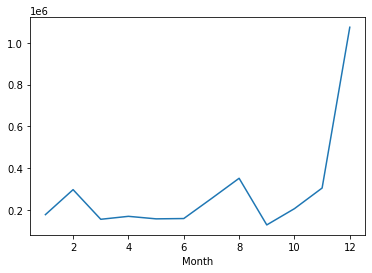

In [22]:
data2.plot(x='Month', y='DomesticBox_Office')

In [30]:
axis = data2[['']]

KeyError: 'DomesticBox_Office'

In [25]:
data2(index='Month', columns='DomesticBox_Office', values='Genre', aggfunc='sum').plot.bar(rot=0, stacked=True)

AttributeError: 'Series' object has no attribute 'pivot_table'

IndexError: index 0 is out of bounds for axis 0 with size 0

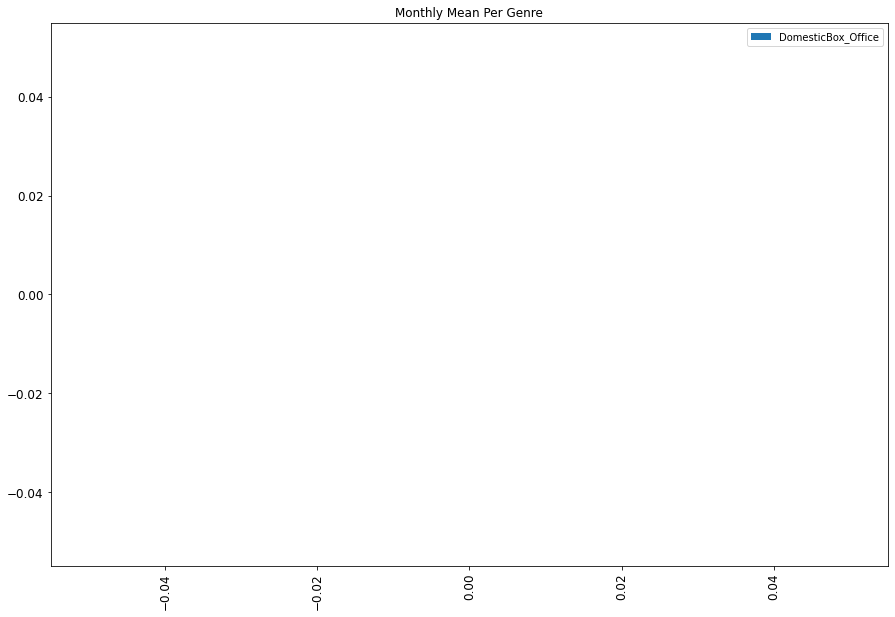

In [12]:
import matplotlib.pyplot as plt
ax = data2[['Genre','DomesticBox_Office']].plot(kind='bar', title ="Monthly Mean Per Genre", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("Genre", fontsize=12)
plt.show()

In [ ]:
#extra functions that i dont want to delete yet.
#=================================================
#=================================================

def get_col_mean(col):
    #"drops na to find avg. col is clean pandas str format"
    df1 = col
    df1 = df1.dropna()
    df1 = df1.astype(int)
    
    return str(int(df1.mean()))


def get_col_median(col):
    #"drops na to find avg. col is clean pandas str format"
    df1 = col
    df1 = df1.dropna()
    df1 = df1.astype(int)
    
    return str(int(df1.median()))


def get_keys(path):
    #get .json file from local machine
    with open(path) as f:
        return json.load(f)
    

def get_movie_info(title, year, api_key):
    #plug in title, year, apikey to return the full api of the selected movie.
    #each api request requires the url and the params (at least the title or the movie id)
    api_url = "http://www.omdbapi.com/?apikey={}".format(api_key)
    params = {
            't' : title,
            'type': 'movie',
            'y' : year
            }
    response = requests.get(api_url, params = params).json()
    return response


def get_movie_search(title, year, api_key):
    api_url = "http://www.omdbapi.com/?apikey={}".format(api_key)
    params = {
            's' : title,
            'type': 'movie',
            'y' : year,
            'plot' : 'full'
            }
    response = requests.get(api_url, params = params).json()
    return response


def get_release_data_list(df1, year, api_key):
    release_month = []
    genre_list = []
    for i in range(1, 6):
    # loop to find the first 20 releash dates
        title = df1['Movie'][i]
        
        
        try:
            a = get_movie_info(title, 2020, api_key)
            
            month = a['Released']
            genre = a['Genre'].split(',')
            
            release_month.append(month)
            genre_list.append(genre)
        except KeyError:
            
            try:
                title_word_list = title.split()
                title = " "
                title = title.join(title_word_list[:2])

                search = get_movie_search(title, year, api_key)
                real_title = search['Search'][0]['Title']

                a = get_movie_info(real_title, 2020, api_key)
                
                month = a['Released']
                genre = a['Genre'].split(',')
                
                release_month.append(month)
                genre_list.append(genre)
                
            except KeyError:
                release_month.append(np.nan)
    
        time.sleep(.5)
        
    release_and_genre_list = [release_month, genre_list]
        
    return release_and_genre_list


In [ ]:
#trash code that i dont want to delete yet
#=================================================
#test two, replacing nan with median
#just playing with data, nothing here meaningful at the moment. (trash code)

#print(df['OpeningWeekendBox Office'].apply(['mean', 'median', 'std']))
#df['OpeningWeekendBox Office'].hist()

#print(df['DomesticBoxOffice'].apply(['mean', 'median', 'std']))
#df['DomesticBoxOffice'].hist()

In [ ]:
# need to change to a remote file location. 
keys = get_keys("/Users/Deric/Documents/Flatiron/phase_One/.secret/omdb_api.json")
api_key = keys['api_key']

In [ ]:
#this cell is just testing my function above. will delete later
title = 'Birds of Prey'
year = 2020

get_movie_search(title, year, api_key)


In [ ]:
# testing functions (will delete later)
z = get_movie_search(title, year, api_key)
z['Search'][0]["Title"]

In [ ]:
# testing functions (will delete later)
a = get_movie_info('Harley Quinn: Birds of Prey', year, api_key)
a['Released']

In [ ]:
# testing functions (will delete later)
get_movie_info('Harley Quinn: Birds of Prey', year, api_key)

In [ ]:
# testing functions (will delete later)
#this cell is just testing my function above.
title = 'Bad Boys For Life'
year = 2020

a = get_movie_info(title, year, api_key)
get_movie_info(title, year, api_key)

In [ ]:
get_release_data_list(df,2020, api_key)
a = get_release_data_list(df,2020, api_key)
a[0]